## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

### Grading

This homework is due **Jan. 31, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Ability to read in data - 10%
* Ability to describe data - 20%
* Ability to visualize data - 20%
* Ability to clean data - 20%
* Storytelling - 20%

In [185]:
import seaborn as sns
%matplotlib inline
#stuff to read in the json
import json
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#silencing deprication warnings
import warnings
import xlrd 
warnings.filterwarnings("ignore")

# (JSON) I am a Pokemon Apprentice
## My goal is to catch all the pokemon in the world
### To to do this I need to start at the bottom and work my way up 

## Loading Data

In [280]:
get_requests = requests.get("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")
pokemon_dict = json.loads(get_requests.text)
pokemon_dict.keys()

dict_keys(['pokemon'])

Here we load the json data into an easier-to-read dataframe

In [281]:
pokemon_gen = pd.DataFrame(pokemon_dict['pokemon'])
pokemon_gen.head(15)

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,69.00,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,NaN,0.6900,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg
1,4.20,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.0420,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg
2,1.70,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,NaN,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.0170,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg
3,25.30,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,NaN,0.2530,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg
4,1.20,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.0120,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg
5,0.31,Charmander Candy,NaN,Not in Eggs,1.70 m,6,http://www.serebii.net/pokemongo/pokemon/006.png,None,Charizard,NaN,006,"[{'num': '004', 'name': 'Charmander'}, {'num':...",0.0031,13:34,"[Fire, Flying]","[Water, Electric, Rock]",90.5 kg
6,58.00,Squirtle Candy,25.0,2 km,0.51 m,7,http://www.serebii.net/pokemongo/pokemon/007.png,[2.1],Squirtle,"[{'num': '008', 'name': 'Wartortle'}, {'num': ...",007,NaN,0.5800,04:25,[Water],"[Electric, Grass]",9.0 kg
7,3.40,Squirtle Candy,100.0,Not in Eggs,0.99 m,8,http://www.serebii.net/pokemongo/pokemon/008.png,[1.4],Wartortle,"[{'num': '009', 'name': 'Blastoise'}]",008,"[{'num': '007', 'name': 'Squirtle'}]",0.0340,07:02,[Water],"[Electric, Grass]",22.5 kg
8,0.67,Squirtle Candy,NaN,Not in Eggs,1.60 m,9,http://www.serebii.net/pokemongo/pokemon/009.png,None,Blastoise,NaN,009,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",0.0067,00:06,[Water],"[Electric, Grass]",85.5 kg
9,303.20,Caterpie Candy,12.0,2 km,0.30 m,10,http://www.serebii.net/pokemongo/pokemon/010.png,[1.05],Caterpie,"[{'num': '011', 'name': 'Metapod'}, {'num': '0...",010,NaN,3.0320,16:35,[Bug],"[Fire, Flying, Rock]",2.9 kg


Here we check to see where we don't have values

## Cleaning Data

In [282]:
pokemon_gen.isnull().sum()

avg_spawns         0
candy              0
candy_count       81
egg                0
height             0
id                 0
img                0
multipliers       81
name               0
next_evolution    81
num                0
prev_evolution    79
spawn_chance       0
spawn_time         0
type               0
weaknesses         0
weight             0
dtype: int64

We see that some Pokemon do not have a pre-evolution and some don't evolve. Our rudimentary knowledge of Pokemon confirms this is not an issue. We will change these null values to strings that say None instead

In [283]:
pokemon_gen.loc[pokemon_gen['prev_evolution'].isnull(), 'prev_evolution']='None'
pokemon_gen.loc[pokemon_gen['next_evolution'].isnull(), 'next_evolution']='None'

We check to see that that did it's job, and in fact it did

In [10]:
pokemon_gen.isnull().sum()

avg_spawns         0
candy              0
candy_count       81
egg                0
height             0
id                 0
img                0
multipliers       81
name               0
next_evolution     0
num                0
prev_evolution     0
spawn_chance       0
spawn_time         0
type               0
weaknesses         0
weight             0
dtype: int64

In [54]:
pokemon_gen

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight,name_pre_evolution,name_next_evolution
0,69.000,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,None,0.6900,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg,None,Ivysaur
1,4.200,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.0420,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg,Bulbasaur,Venusaur
2,1.700,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,None,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.0170,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg,Bulbasaur,None
3,25.300,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,None,0.2530,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg,None,Charmeleon
4,1.200,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.0120,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg,Charmander,Charizard
5,0.310,Charmander Candy,NaN,Not in Eggs,1.70 m,6,http://www.serebii.net/pokemongo/pokemon/006.png,None,Charizard,None,006,"[{'num': '004', 'name': 'Charmander'}, {'num':...",0.0031,13:34,"[Fire, Flying]","[Water, Electric, Rock]",90.5 kg,Charmander,None
6,58.000,Squirtle Candy,25.0,2 km,0.51 m,7,http://www.serebii.net/pokemongo/pokemon/007.png,[2.1],Squirtle,"[{'num': '008', 'name': 'Wartortle'}, {'num': ...",007,None,0.5800,04:25,[Water],"[Electric, Grass]",9.0 kg,None,Wartortle
7,3.400,Squirtle Candy,100.0,Not in Eggs,0.99 m,8,http://www.serebii.net/pokemongo/pokemon/008.png,[1.4],Wartortle,"[{'num': '009', 'name': 'Blastoise'}]",008,"[{'num': '007', 'name': 'Squirtle'}]",0.0340,07:02,[Water],"[Electric, Grass]",22.5 kg,Squirtle,Blastoise
8,0.670,Squirtle Candy,NaN,Not in Eggs,1.60 m,9,http://www.serebii.net/pokemongo/pokemon/009.png,None,Blastoise,None,009,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",0.0067,00:06,[Water],"[Electric, Grass]",85.5 kg,Squirtle,None
9,303.200,Caterpie Candy,12.0,2 km,0.30 m,10,http://www.serebii.net/pokemongo/pokemon/010.png,[1.05],Caterpie,"[{'num': '011', 'name': 'Metapod'}, {'num': '0...",010,None,3.0320,16:35,[Bug],"[Fire, Flying, Rock]",2.9 kg,None,Metapod


We look at the columns and we see some that will be useless to us looking at the data this way, such as image links, so we can get rid of them

In [56]:
pokemon_gen.columns

Index(['avg_spawns', 'candy', 'candy_count', 'egg', 'height', 'id', 'img',
       'multipliers', 'name', 'next_evolution', 'num', 'prev_evolution',
       'spawn_chance', 'spawn_time', 'type', 'weaknesses', 'weight',
       'name_pre_evolution', 'name_next_evolution'],
      dtype='object')

We drop the image column on our data, because it isn't useful to us

In [71]:
pokemon_gen.drop('img',axis=1)

,avg_spawns,candy,candy_count,egg,height,id,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight,name_pre_evolution,name_next_evolution
0,69.000,Bulbasaur Candy,25.0,2 km,0.71 m,1,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,None,0.6900,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg,None,Ivysaur
1,4.200,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.0420,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg,Bulbasaur,Venusaur
2,1.700,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,None,Venusaur,None,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.0170,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg,Bulbasaur,None
3,25.300,Charmander Candy,25.0,2 km,0.61 m,4,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,None,0.2530,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg,None,Charmeleon
4,1.200,Charmander Candy,100.0,Not in Eggs,1.09 m,5,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.0120,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg,Charmander,Charizard
5,0.310,Charmander Candy,NaN,Not in Eggs,1.70 m,6,None,Charizard,None,006,"[{'num': '004', 'name': 'Charmander'}, {'num':...",0.0031,13:34,"[Fire, Flying]","[Water, Electric, Rock]",90.5 kg,Charmander,None
6,58.000,Squirtle Candy,25.0,2 km,0.51 m,7,[2.1],Squirtle,"[{'num': '008', 'name': 'Wartortle'}, {'num': ...",007,None,0.5800,04:25,[Water],"[Electric, Grass]",9.0 kg,None,Wartortle
7,3.400,Squirtle Candy,100.0,Not in Eggs,0.99 m,8,[1.4],Wartortle,"[{'num': '009', 'name': 'Blastoise'}]",008,"[{'num': '007', 'name': 'Squirtle'}]",0.0340,07:02,[Water],"[Electric, Grass]",22.5 kg,Squirtle,Blastoise
8,0.670,Squirtle Candy,NaN,Not in Eggs,1.60 m,9,None,Blastoise,None,009,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",0.0067,00:06,[Water],"[Electric, Grass]",85.5 kg,Squirtle,None
9,303.200,Caterpie Candy,12.0,2 km,0.30 m,10,[1.05],Caterpie,"[{'num': '011', 'name': 'Metapod'}, {'num': '0...",010,None,3.0320,16:35,[Bug],"[Fire, Flying, Rock]",2.9 kg,None,Metapod


On the path to glory we want to know which Pokemon spawn the easisest, so that we can seek after those Pokemon first so we can begin our journey. We can sort our data by spawn rate. This will help us isolate the pokemon that we want to find first. We can choose an easy pokemon that spawns eaisly as our first target to begin our Pokemon adventure

In [61]:
pokemon_gen.sort_values(by='spawn_chance', ascending=False)

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight,name_pre_evolution,name_next_evolution
15,1.598,Pidgey Candy,12.0,2 km,0.30 m,16,http://www.serebii.net/pokemongo/pokemon/016.png,"[1.71, 1.92]",Pidgey,"[{'num': '017', 'name': 'Pidgeotto'}, {'num': ...",016,None,15.9800,01:34,"[Normal, Flying]","[Electric, Rock]",1.8 kg,None,Pidgeotto
18,1.305,Rattata Candy,25.0,2 km,0.30 m,19,http://www.serebii.net/pokemongo/pokemon/019.png,"[2.55, 2.73]",Rattata,"[{'num': '020', 'name': 'Raticate'}]",019,None,13.0500,01:55,[Normal],[Fighting],3.5 kg,None,Raticate
12,712.000,Weedle Candy,12.0,2 km,0.30 m,13,http://www.serebii.net/pokemongo/pokemon/013.png,"[1.01, 1.09]",Weedle,"[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",013,None,7.1200,02:21,"[Bug, Poison]","[Fire, Flying, Psychic, Rock]",3.2 kg,None,Kakuna
40,652.000,Zubat Candy,50.0,2 km,0.79 m,41,http://www.serebii.net/pokemongo/pokemon/041.png,"[2.6, 3.67]",Zubat,"[{'num': '042', 'name': 'Golbat'}]",041,None,6.5200,12:28,"[Poison, Flying]","[Electric, Ice, Psychic, Rock]",7.5 kg,None,Golbat
128,478.000,Magikarp Candy,400.0,2 km,0.89 m,129,http://www.serebii.net/pokemongo/pokemon/129.png,"[10.1, 11.8]",Magikarp,"[{'num': '130', 'name': 'Gyarados'}]",129,None,4.7800,14:26,[Water],"[Electric, Grass]",10.0 kg,None,Gyarados
20,473.000,Spearow Candy,50.0,2 km,0.30 m,21,http://www.serebii.net/pokemongo/pokemon/021.png,"[2.66, 2.68]",Spearow,"[{'num': '022', 'name': 'Fearow'}]",021,None,4.7300,12:25,"[Normal, Flying]","[Electric, Rock]",2.0 kg,None,Fearow
95,321.000,Drowzee Candy,50.0,5 km,0.99 m,96,http://www.serebii.net/pokemongo/pokemon/096.png,"[2.08, 2.09]",Drowzee,"[{'num': '097', 'name': 'Hypno'}]",096,None,3.2100,01:51,[Psychic],"[Bug, Ghost, Dark]",32.4 kg,None,Hypno
9,303.200,Caterpie Candy,12.0,2 km,0.30 m,10,http://www.serebii.net/pokemongo/pokemon/010.png,[1.05],Caterpie,"[{'num': '011', 'name': 'Metapod'}, {'num': '0...",010,None,3.0320,16:35,[Bug],"[Fire, Flying, Rock]",2.9 kg,None,Metapod
132,275.000,Eevee Candy,25.0,10 km,0.30 m,133,http://www.serebii.net/pokemongo/pokemon/133.png,"[2.02, 2.64]",Eevee,"[{'num': '134', 'name': 'Vaporeon'}, {'num': '...",133,None,2.7500,05:32,[Normal],[Fighting],6.5 kg,None,Vaporeon
53,254.000,Psyduck Candy,50.0,5 km,0.79 m,54,http://www.serebii.net/pokemongo/pokemon/054.png,[2.27],Psyduck,"[{'num': '055', 'name': 'Golduck'}]",054,None,2.5400,03:41,[Water],"[Electric, Grass]",19.6 kg,None,Golduck


In [62]:
pokemon_gen.dtypes

avg_spawns             float64
candy                   object
candy_count            float64
egg                     object
height                  object
id                       int64
img                     object
multipliers             object
name                    object
next_evolution          object
num                     object
prev_evolution          object
spawn_chance           float64
spawn_time              object
type                    object
weaknesses              object
weight                  object
name_pre_evolution      object
name_next_evolution     object
dtype: object

We will want to know whether Pokemon are already evolved when we find them in the wild. We will go through our data and clean up the previous evolution so that it only shows the name of the pre-evolution and not any brackets or excess text

In [13]:
pokemon_new = pokemon_gen[pokemon_gen['prev_evolution'] != 'None']
vals = pokemon_new['prev_evolution']
l = []
for i in vals.index:
    pokemon_gen.loc[i,'name_pre_evolution'] = vals[i][0]['name']

This is the index we used in determining what code to run to acheive this

In [284]:
vals.index

Int64Index([  1,   2,   4,   5,   7,   8,  10,  11,  13,  14,  16,  17,  19,
             21,  23,  25,  27,  29,  30,  32,  33,  35,  37,  39,  41,  43,
             44,  46,  48,  50,  52,  54,  56,  58,  60,  61,  63,  64,  66,
             67,  69,  70,  72,  74,  75,  77,  79,  81,  84,  86,  88,  90,
             92,  93,  96,  98, 100, 102, 104, 109, 111, 116, 118, 120, 129,
            133, 134, 135, 138, 140, 147, 148],
           dtype='int64')

We found the value we want--the name to be within a dictionary within a list

In [285]:
vals

1                  [{'num': '001', 'name': 'Bulbasaur'}]
2      [{'num': '001', 'name': 'Bulbasaur'}, {'num': ...
4                 [{'num': '004', 'name': 'Charmander'}]
5      [{'num': '004', 'name': 'Charmander'}, {'num':...
7                   [{'num': '007', 'name': 'Squirtle'}]
8      [{'num': '007', 'name': 'Squirtle'}, {'num': '...
10                  [{'num': '010', 'name': 'Caterpie'}]
11     [{'num': '010', 'name': 'Caterpie'}, {'num': '...
13                    [{'num': '013', 'name': 'Weedle'}]
14     [{'num': '013', 'name': 'Weedle'}, {'num': '01...
16                    [{'num': '016', 'name': 'Pidgey'}]
17     [{'num': '016', 'name': 'Pidgey'}, {'num': '01...
19                   [{'num': '019', 'name': 'Rattata'}]
21                   [{'num': '021', 'name': 'Spearow'}]
23                     [{'num': '023', 'name': 'Ekans'}]
25                   [{'num': '025', 'name': 'Pikachu'}]
27                 [{'num': '027', 'name': 'Sandshrew'}]
29           [{'num': '029', 'n

We will do the same for all Pokemon's next evolution

In [14]:
pokemon_nextevo = pokemon_gen[pokemon_gen['next_evolution'] != 'None']
vals2 = pokemon_nextevo['next_evolution']
l = []
for i in vals2.index:
    pokemon_gen.loc[i,'name_next_evolution'] = vals2[i][0]['name']

We replace any null values with the string "none"

In [17]:
pokemon_gen.loc[pokemon_gen['name_pre_evolution'].isnull(), 'name_pre_evolution']='None'
pokemon_gen.loc[pokemon_gen['name_next_evolution'].isnull(), 'name_next_evolution']='None'

Now that we have that we can drop the origial columns with the non-essential information

In [287]:
pokemon_gen2 = pokemon_gen.drop(pokemon_gen.ix[:,'next_evolution':'prev_evolution':].head(0).columns, axis=1)

In [95]:
pokemon_gen2

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,spawn_chance,spawn_time,type,weaknesses,weight,name_pre_evolution,name_next_evolution
0,69.000,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,0.6900,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg,None,Ivysaur
1,4.200,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,0.0420,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg,Bulbasaur,Venusaur
2,1.700,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,0.0170,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg,Bulbasaur,None
3,25.300,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,0.2530,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg,None,Charmeleon
4,1.200,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,0.0120,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg,Charmander,Charizard
5,0.310,Charmander Candy,NaN,Not in Eggs,1.70 m,6,http://www.serebii.net/pokemongo/pokemon/006.png,None,Charizard,0.0031,13:34,"[Fire, Flying]","[Water, Electric, Rock]",90.5 kg,Charmander,None
6,58.000,Squirtle Candy,25.0,2 km,0.51 m,7,http://www.serebii.net/pokemongo/pokemon/007.png,[2.1],Squirtle,0.5800,04:25,[Water],"[Electric, Grass]",9.0 kg,None,Wartortle
7,3.400,Squirtle Candy,100.0,Not in Eggs,0.99 m,8,http://www.serebii.net/pokemongo/pokemon/008.png,[1.4],Wartortle,0.0340,07:02,[Water],"[Electric, Grass]",22.5 kg,Squirtle,Blastoise
8,0.670,Squirtle Candy,NaN,Not in Eggs,1.60 m,9,http://www.serebii.net/pokemongo/pokemon/009.png,None,Blastoise,0.0067,00:06,[Water],"[Electric, Grass]",85.5 kg,Squirtle,None
9,303.200,Caterpie Candy,12.0,2 km,0.30 m,10,http://www.serebii.net/pokemongo/pokemon/010.png,[1.05],Caterpie,3.0320,16:35,[Bug],"[Fire, Flying, Rock]",2.9 kg,None,Metapod


In [96]:
pokemon_gen2.describe()

,avg_spawns,candy_count,id,spawn_chance
count,151.000000,70.000000,151.000000,151.000000
mean,53.992603,57.300000,76.000000,0.731985
std,111.156064,48.897512,43.734045,1.956376
min,0.000000,12.000000,1.000000,0.000000
25%,1.450000,31.250000,38.500000,0.015500
50%,7.200000,50.000000,76.000000,0.074000
75%,55.000000,50.000000,113.500000,0.620000
max,712.000000,400.000000,151.000000,15.980000


## Visualizing Data

Knowing the distribution of the spawn chances helps us know what type of Pokemon to focus the majority of our time on if we want to catch them all. If we find a pokemon with a certain spawn chance, we can use this distribution plot as reference to know just how rare that pokemon truly is. 

Text(0.5, 1.0, 'Pokemon Spawn Chance Varability')

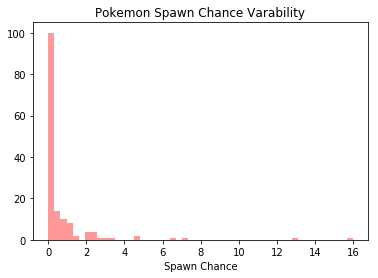

In [350]:
sns.distplot(pokemon_gen['spawn_chance'], kde=False,color="r",axlabel='Spawn Chance')
plt.title('Pokemon Spawn Chance Varability')

In [68]:
pokemon_gen.columns

Index(['avg_spawns', 'candy', 'candy_count', 'egg', 'height', 'id', 'img',
       'multipliers', 'name', 'next_evolution', 'num', 'prev_evolution',
       'spawn_chance', 'spawn_time', 'type', 'weaknesses', 'weight',
       'name_pre_evolution', 'name_next_evolution'],
      dtype='object')

We want to find out if Pokemon that we're discovered later (and have higher id's) have a 
difference in spawn rate. Usually the farther we get away from home, the rarer the pokemon can get, but is this always true? We can graph the spawn chance and ID's to get a rough estimate on if this is true

Text(0.5, 1.0, 'Changes in Pokemon Spawn Chance')

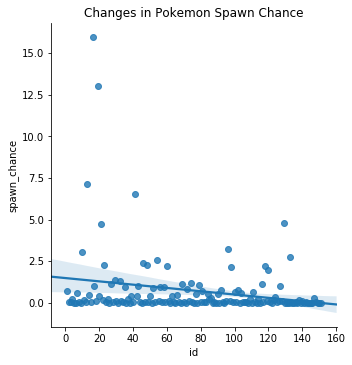

In [349]:
sns.lmplot(x="id", y="spawn_chance", data=pokemon_gen)
plt.title('Changes in Pokemon Spawn Chance')

In [323]:
pokemon_gen['weight']

0        6.9 kg
1       13.0 kg
2      100.0 kg
3        8.5 kg
4       19.0 kg
5       90.5 kg
6        9.0 kg
7       22.5 kg
8       85.5 kg
9        2.9 kg
10       9.9 kg
11      32.0 kg
12       3.2 kg
13      10.0 kg
14      29.5 kg
15       1.8 kg
16      30.0 kg
17      39.5 kg
18       3.5 kg
19      18.5 kg
20       2.0 kg
21      38.0 kg
22       6.9 kg
23      65.0 kg
24       6.0 kg
25      30.0 kg
26      12.0 kg
27      29.5 kg
28       7.0 kg
29      20.0 kg
         ...   
121     54.5 kg
122     56.0 kg
123     40.6 kg
124     30.0 kg
125     44.5 kg
126     55.0 kg
127     88.4 kg
128     10.0 kg
129    235.0 kg
130    220.0 kg
131      4.0 kg
132      6.5 kg
133     29.0 kg
134     24.5 kg
135     25.0 kg
136     36.5 kg
137      7.5 kg
138     35.0 kg
139     11.5 kg
140     40.5 kg
141     59.0 kg
142    460.0 kg
143     55.4 kg
144     52.6 kg
145     60.0 kg
146      3.3 kg
147     16.5 kg
148    210.0 kg
149    122.0 kg
150      4.0 kg
Name: weight, Length: 15

### For my last visualization I needed to do a little more cleaning

Both weight and height were objects with units, so I had to strip the units and change their types to floats

In [324]:
pokemon_gen['weight']= pokemon_gen['weight'].map(lambda x: x.rstrip(' kg'))
pokemon_gen['weight'] = pd.to_numeric(pokemon_gen['weight'])

In [331]:
pokemon_gen['weight'].dtypes

dtype('float64')

In [337]:
pokemon_gen['height']=pokemon_gen['height'].map(lambda x: x.rstrip(' m'))
pokemon_gen['height']=pd.to_numeric(pokemon_gen['height'])

As I continue my pokemon journey I am beginning to be concerned that my back will break from carrying around all these heavy pokemon. I begin to wonder if pokemon are like humans and get heavier as they go. I don't want to get tired and have to stop my journey early. This data could also be useful as I am considering becoming a Pokemon professor, and studying them in ways like this is good for research 

Text(0.5, 1.0, 'Pokemon Characteristics')

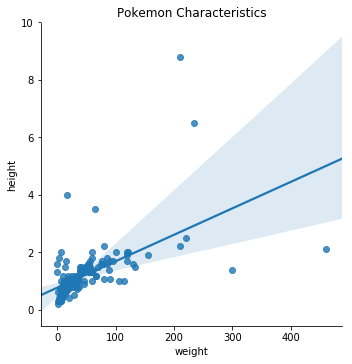

In [348]:
sns.lmplot(x="weight", y="height", data=pokemon_gen)
plt.title('Pokemon Characteristics')

# CSV File

For my second data set we will use a CSV file. I found one on Kaggle that shows various admission statistics that I liked. I am going to use this data to try and see what I should focus on in order to get accepted to a graduate school in a few years. 

## Load Data

In [321]:
graduation = pd.read_csv('Admission_Predict.csv')

Starting we check to see if our data needs to be cleaned at all, if we have any null values that we need to drop

In [322]:
graduation.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

We clean up the data by dropping any rows with null values

## Clean the Data

In [320]:
clean_the_data = Graduation.dropna()

clean_the_data["Research"].value_counts()

1    219
0    181
Name: Research, dtype: int64

Next we check to see if we need to format any dates, or change any other formatting to make our data clear. Overall this data set is extremly clean and has needs little changes or formatting. There was only 1 null value, and everything seems really complete overall

In [318]:
graduation

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [51]:
clean_the_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Here we can see what some of the ranges of our columns--such as University Rating ranges from 1 to 5, Research is a dummy variable, and the test scores have good ranges, which is good for us, because we can use that to see how they affect the chance of addmission

In [42]:
clean_the_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [30]:
clean_the_data["GRE Score"].mean()

316.8075

## Visualize Data

Looking at distribution of GRE Scores helps me figure out what score I need to hit in order to stand out of the crowd. It looks like the data is approx normally distributed, with a mean of 315. It looks like If I could acheive a score greater than 325, I could rise above the middle part of the distribution and stand out

Text(0.5, 1.0, 'GRE Score Dist')

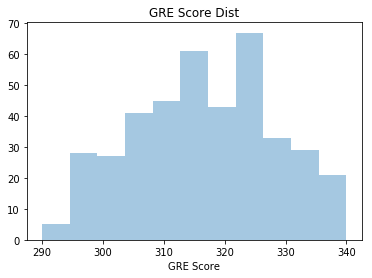

In [357]:
sns.distplot(clean_the_data['GRE Score'], kde=False)
plt.title('GRE Score Dist')

In [166]:
clean_the_data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

I tried for 30 minutes to make a Chance of Admit and University Rating scatter plot, only to realize the data set
put an extra space after "Chance of Admit". It was a lesson to me about proper spacing 

Logically one would thing the higher the "University Rating" the lower the chance of admission. So by making a line plot we can do a sanity check, making sure that that is true. 

Text(0.5, 1.0, 'University Rating and Chance of Admission')

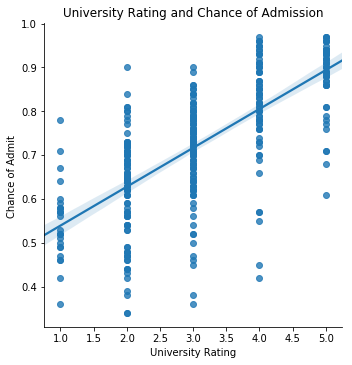

In [356]:
sns.lmplot(x="University Rating", y="Chance of Admit ", data=clean_the_data)
plt.title('University Rating and Chance of Admission')

In [175]:
clean_the_data['CGPA'] = pd.to_numeric(clean_the_data['CGPA'])

We see here that there seems to be a very strong correlation between the "University Rating" and an applicants chance of admission. 

Knowing the correlation between various scores would probably be the best way at determining what scores give you the best chance of admission. So a correlation map would be a good visualization, to help us understand the various correlations, and what correlations are stronger

Text(0.5, 1.0, 'Correlation Map')

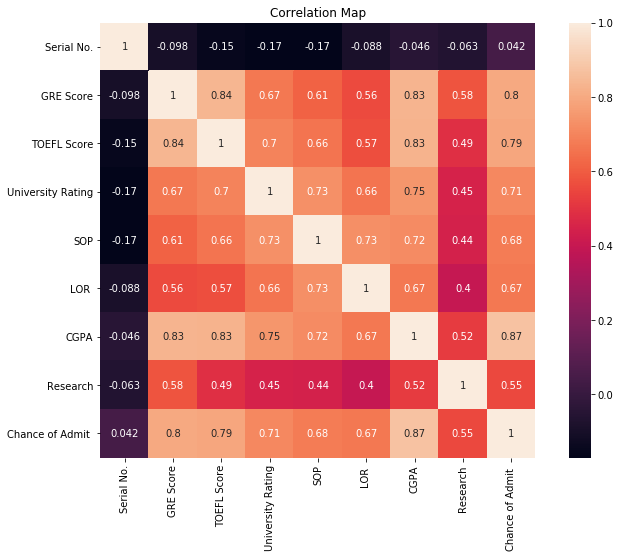

In [184]:
clean_the_data = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',"Chance of Admit"]
fig, ax = plt.subplots(figsize=(12, 8))
plot = sns.heatmap(clean_the_data.corr(), square = True, annot = True)
plot.set_title("Correlation Map")

It seems like from this correlation map that an applicants GRE Score is highly correlated with Chance of Admission. Supprisingly an applicants CGPA score has an even greater correlation--helping me understand that I need to divide my time over a couple of different tests in order to have the highest chance of admission into the college of my choice.

Also for a sanity check the Serial Number has the lowest correlations of any of our variables, which we would expect

# API
## For my 3rd Data Set we will use API

I found some government data online listing the gas prices throughout each month for approximately the last 25 years. I want to use this data to see if I can make better consumer choices about when I buy gas

## Load Data

In [305]:
api_url = "http://api.eia.gov/series/?api_key=1ca12924e78e6d480f3a01b0cc96fc65&series_id=PET.EMM_EPMRR_PTE_NUS_DPG.M"
api_request = requests.get(api_url)
api_gas = api_request.json()

The government website that I got this from has you get a key, so here we load in the data 

We change the data to tupils so we can use it

In [307]:
series = api_gas['series']
g = pd.Series(series[0]['data'])
gas = g.apply(pd.Series)
gas.columns = ['caldt','price']

In [268]:
gas.head()

,caldt,price
0,201901,2.464
1,201812,2.581
2,201811,2.829
3,201810,3.017
4,201809,2.979


## Clean Data

Here we simply change the formatting of the column with our dates, and we clean the data by dropping any null values

In [269]:
gas['caldt'] = pd.to_datetime(gas['caldt'], format = "%Y%m")

Checking for Null values shows we have a null value for price that we will have to clean up. 

In [265]:
gas.isnull().sum()

caldt    0
price    1
dtype: int64

In [266]:
gas = gas.dropna()

In [267]:
gas.columns

Index(['caldt', 'price'], dtype='object')

In [270]:
gas_prices.head(15)

,caldt,price
0,2019-01-01,2.464
1,2018-12-01,2.581
2,2018-11-01,2.829
3,2018-10-01,3.017
4,2018-09-01,2.979
5,2018-08-01,2.983
6,2018-07-01,3.015
7,2018-06-01,3.078
8,2018-05-01,3.096
9,2018-04-01,2.978


We check to see if that fixed the formatting, so we can read the data more intuitively

## Visualize Data

A Line Plot can help us visualize if the month of the year results in consistent fluctuations in the price of gas

Text(0.5, 1.0, 'Gas Price Changes over time')

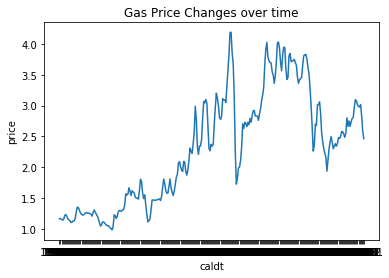

In [355]:
sns.lineplot(x="caldt", y="price",data=gas)
plt.title('Gas Price Changes over time')

That line plot is a little confusing to understand and eaisly draw correlations from. We will switch to a different type of visualization: a heat map. 
A heat map can show us visually how the price has changed over time. 

Text(0.5, 1.0, 'GAS PRICES')

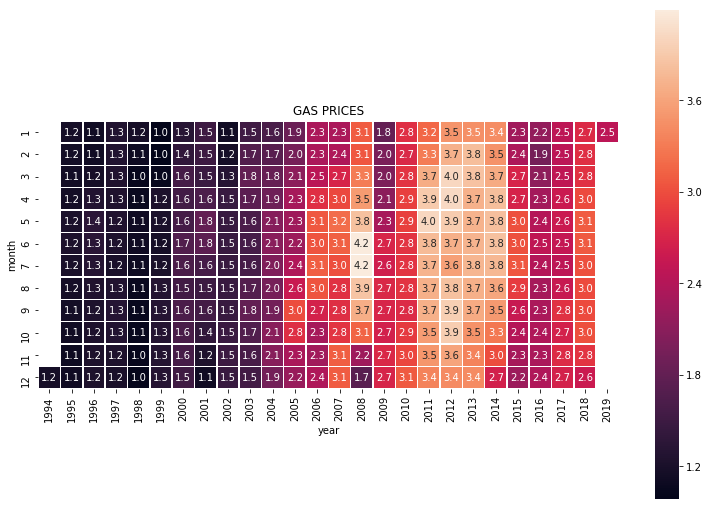

In [304]:
gas['year']=gas['caldt'].dt.year
gas['month']=gas['caldt'].dt.month
gas_pivot = gas.pivot("month", "year", "price")

f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(gas_pivot, annot=True, fmt=".1f", linewidths=.5, square=True, ax=ax).set_title("GAS PRICES")

We can see that there was a time of very high gas prices in the years surrounding 2010. We can also see we have had a slow rise in gas prices over time, with the colors becoming lighter and lighter. This visualization also seems to show that gas prices can vary month by month. It seems that during the middle months-the summer- prices tend to get higher than in the earlier and later months. This could help us in our consumer decisions by allowing us to save money by increasing our consumption of gas when it is cheaper in the winter, and decrease our consumption when it is more expensive in the summer.  This visualtization help us understand how gas prices change over time. 